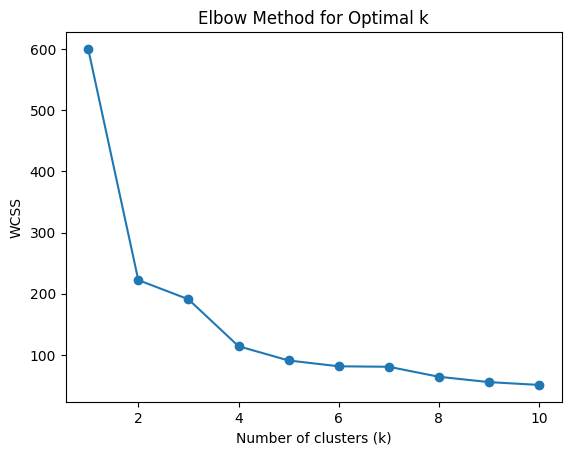

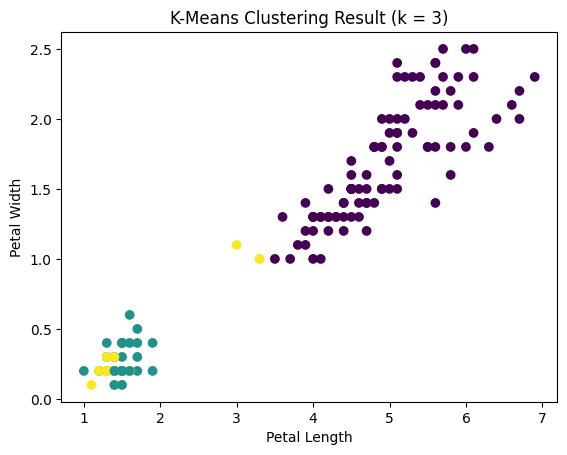

In [ ]:
#TASK 2

# 1. Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# 2. Load the dataset

data = np.array([
    [5.1,3.5,1.4,0.2],[4.9,3.0,1.4,0.2],[4.7,3.2,1.3,0.2],[4.6,3.1,1.5,0.2],
    [5.0,3.6,1.4,0.2],[5.4,3.9,1.7,0.4],[4.6,3.4,1.4,0.3],[5.0,3.4,1.5,0.2],
    [4.4,2.9,1.4,0.2],[4.9,3.1,1.5,0.1],[5.4,3.7,1.5,0.2],[4.8,3.4,1.6,0.2],
    [4.8,3.0,1.4,0.1],[4.3,3.0,1.1,0.1],[5.8,4.0,1.2,0.2],[5.7,4.4,1.5,0.4],
    [5.4,3.9,1.3,0.4],[5.1,3.5,1.4,0.3],[5.7,3.8,1.7,0.3],[5.1,3.8,1.5,0.3],
    [5.4,3.4,1.7,0.2],[5.1,3.7,1.5,0.4],[4.6,3.6,1.0,0.2],[5.1,3.3,1.7,0.5],
    [4.8,3.4,1.9,0.2],[5.0,3.0,1.6,0.2],[5.0,3.4,1.6,0.4],[5.2,3.5,1.5,0.2],
    [5.2,3.4,1.4,0.2],[4.7,3.2,1.6,0.2],[4.8,3.1,1.6,0.2],[5.4,3.4,1.5,0.4],
    [5.2,4.1,1.5,0.1],[5.5,4.2,1.4,0.2],[4.9,3.1,1.5,0.2],[5.0,3.2,1.2,0.2],
    [5.5,3.5,1.3,0.2],[4.9,3.6,1.4,0.1],[4.4,3.0,1.3,0.2],[5.1,3.4,1.5,0.2],
    [5.0,3.5,1.3,0.3],[4.5,2.3,1.3,0.3],[4.4,3.2,1.3,0.2],[5.0,3.5,1.6,0.6],
    [5.1,3.8,1.9,0.4],[4.8,3.0,1.4,0.3],[5.1,3.8,1.6,0.2],[4.6,3.2,1.4,0.2],
    [5.3,3.7,1.5,0.2],[5.0,3.3,1.4,0.2],
    [7.0,3.2,4.7,1.4],[6.4,3.2,4.5,1.5],[6.9,3.1,4.9,1.5],[5.5,2.3,4.0,1.3],
    [6.5,2.8,4.6,1.5],[5.7,2.8,4.5,1.3],[6.3,3.3,4.7,1.6],[4.9,2.4,3.3,1.0],
    [6.6,2.9,4.6,1.3],[5.2,2.7,3.9,1.4],[5.0,2.0,3.5,1.0],[5.9,3.0,4.2,1.5],
    [6.0,2.2,4.0,1.0],[6.1,2.9,4.7,1.4],[5.6,2.9,3.6,1.3],[6.7,3.1,4.4,1.4],
    [5.6,3.0,4.5,1.5],[5.8,2.7,4.1,1.0],[6.2,2.2,4.5,1.5],[5.6,2.5,3.9,1.1],
    [5.9,3.2,4.8,1.8],[6.1,2.8,4.0,1.3],[6.3,2.5,4.9,1.5],[6.1,2.8,4.7,1.2],
    [6.4,2.9,4.3,1.3],[6.6,3.0,4.4,1.4],[6.8,2.8,4.8,1.4],[6.7,3.0,5.0,1.7],
    [6.0,2.9,4.5,1.5],[5.7,2.6,3.5,1.0],[5.5,2.4,3.8,1.1],[5.5,2.4,3.7,1.0],
    [5.8,2.7,3.9,1.2],[6.0,2.7,5.1,1.6],[5.4,3.0,4.5,1.5],[6.0,3.4,4.5,1.6],
    [6.7,3.1,4.7,1.5],[6.3,2.3,4.4,1.3],[5.6,3.0,4.1,1.3],[5.5,2.5,4.0,1.3],
    [5.5,2.6,4.4,1.2],[6.1,3.0,4.6,1.4],[5.8,2.6,4.0,1.2],[5.0,2.3,3.3,1.0],
    [5.6,2.7,4.2,1.3],[5.7,3.0,4.2,1.2],[5.7,2.9,4.2,1.3],[6.2,2.9,4.3,1.3],
    [5.1,2.5,3.0,1.1],[5.7,2.8,4.1,1.3],
    [6.3,3.3,6.0,2.5],[5.8,2.7,5.1,1.9],[7.1,3.0,5.9,2.1],[6.3,2.9,5.6,1.8],
    [6.5,3.0,5.8,2.2],[7.6,3.0,6.6,2.1],[4.9,2.5,4.5,1.7],[7.3,2.9,6.3,1.8],
    [6.7,2.5,5.8,1.8],[7.2,3.6,6.1,2.5],[6.5,3.2,5.1,2.0],[6.4,2.7,5.3,1.9],
    [6.8,3.0,5.5,2.1],[5.7,2.5,5.0,2.0],[5.8,2.8,5.1,2.4],[6.4,3.2,5.3,2.3],
    [6.5,3.0,5.5,1.8],[7.7,3.8,6.7,2.2],[7.7,2.6,6.9,2.3],[6.0,2.2,5.0,1.5],
    [6.9,3.2,5.7,2.3],[5.6,2.8,4.9,2.0],[7.7,2.8,6.7,2.0],[6.3,2.7,4.9,1.8],
    [6.7,3.3,5.7,2.1],[7.2,3.2,6.0,1.8],[6.2,2.8,4.8,1.8],[6.1,3.0,4.9,1.8],
    [6.4,2.8,5.6,2.1],[7.2,3.0,5.8,1.6],[7.4,2.8,6.1,1.9],[7.9,3.8,6.4,2.0],
    [6.4,2.8,5.6,2.2],[6.3,2.8,5.1,1.5],[6.1,2.6,5.6,1.4],[7.7,3.0,6.1,2.3],
    [6.3,3.4,5.6,2.4],[6.4,3.1,5.5,1.8],[6.0,3.0,4.8,1.8],[6.9,3.1,5.4,2.1],
    [6.7,3.1,5.6,2.4],[6.9,3.1,5.1,2.3],[5.8,2.7,5.1,1.9],[6.8,3.2,5.9,2.3],
    [6.7,3.3,5.7,2.5],[6.7,3.0,5.2,2.3],[6.3,2.5,5.0,1.9],[6.5,3.0,5.2,2.0],
    [6.2,3.4,5.4,2.3],[5.9,3.0,5.1,1.8]
])

# Convert to DataFrame
df = pd.DataFrame(data, columns=[
    'Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width'
])

# 3. Feature Scaling
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# 4. Elbow Method
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel("Number of clusters (k)")
plt.ylabel("WCSS")
plt.title("Elbow Method for Optimal k")
plt.show()

# 5. Apply K-Means (k = 3)
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_data)

# 6. Cluster Visualisation
plt.scatter(df['Petal_Length'], df['Petal_Width'], c=df['Cluster'])
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.title("K-Means Clustering Result (k = 3)")
plt.show()


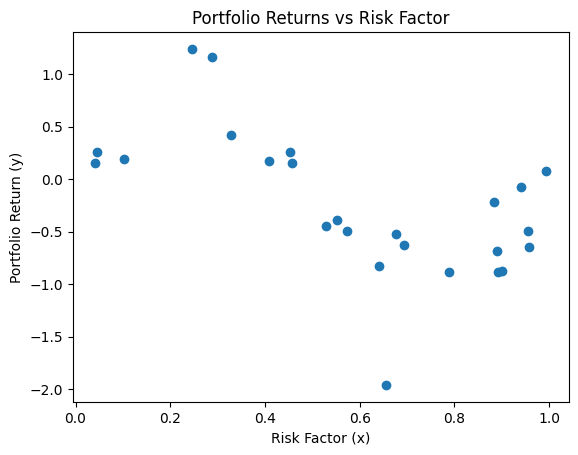

Mean Squared Error (MSE): 0.21480492148559946
R-squared (R²): 0.46732130567418695


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


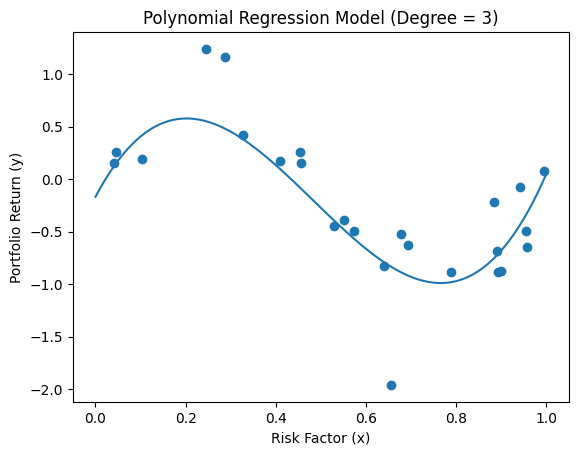

In [ ]:
#Task 3

# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 1. Load the dataset

df = pd.read_csv("Task3_Data_Process (1).csv")

X = df[['x']]   # Risk factor (0 to 1)
y = df['y']     # Portfolio returns

# 2. Visualise the raw data
plt.scatter(X, y)
plt.xlabel("Risk Factor (x)")
plt.ylabel("Portfolio Return (y)")
plt.title("Portfolio Returns vs Risk Factor")
plt.show()

# 3. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 4. Polynomial Regression (degree = 3)
poly = PolynomialFeatures(degree=3)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

model = LinearRegression()
model.fit(X_train_poly, y_train)

# 5. Model prediction and evaluation
y_pred = model.predict(X_test_poly)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R²):", r2)

# 6. Plot regression curve
X_curve = np.linspace(0, 1, 100).reshape(-1, 1)
X_curve_poly = poly.transform(X_curve)
y_curve = model.predict(X_curve_poly)

plt.scatter(X, y)
plt.plot(X_curve, y_curve)
plt.xlabel("Risk Factor (x)")
plt.ylabel("Portfolio Return (y)")
plt.title("Polynomial Regression Model (Degree = 3)")
plt.show()
